In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from movies import *

In [2]:
pd.plotting.register_matplotlib_converters()
plt.rcParams['figure.figsize'] = [12, 8]
# np.warnings.simplefilter(action='ignore')
np.set_printoptions(linewidth=120, suppress=True)

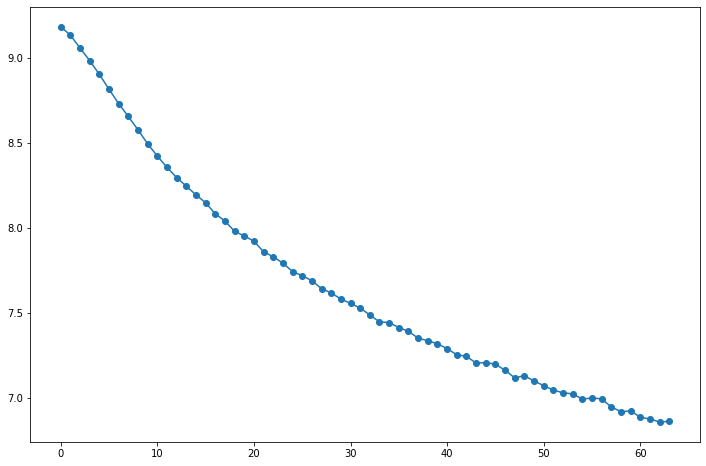

{'n_vocab': 9838, 'n_embed': 256, 'n_hidden': 256, 'n_layers': 2, 'dropout': 0.0, 'term_freq': 32, 'doc_freq': 4, 'n_seq': 32, 'n_batch': 1024, 'learning_rate': 1.0}


In [7]:
save_dir = 'movie_run_02/'

logs = pd.read_csv(save_dir + 'logs.csv')
hist = logs.groupby('epoch').mean()
plt.plot(hist['loss'], 'o-')
plt.show()

model = torch.load(save_dir + 'model.pt')
vocab = pd.read_csv(save_dir + 'vocab.csv', index_col=0)
index = vocab.pop('INDEX')
lookup = pd.Series(index.index, index.values)
# scripts = load_scripts('scripts/', tokenize=True)

with open(save_dir + 'metadata.json', 'r') as file:
    metadata = json.load(file)
print( metadata )

In [8]:
test = """
<p>
abrupt medium close up of alvy singer doing a comedy monologue he wearing a crumbled
sports jacket and tieless shirt the background is stark
<p>
alvy there's an old joke
"""
for i in range(100):
    pred = evaluate_model(test, model, index, missing_ix=-1)
    pred = np.random.choice(pred.index, p=pred.values)
    test = " ".join([test, pred])
print( test )


<p>
abrupt medium close up of alvy singer doing a comedy monologue he wearing a crumbled
sports jacket and tieless shirt the background is stark
<p>
alvy there's an old joke
 completed aids fry fabric justin identified spell horns evelyn difficulty idea stake oliver reactions melted hoo bags harry's shrugging fifth curls coordinates bmw et cups counters practically reynolds magazines med ignore goin' calm stewardess hollywood furniture wary 156 aids 1968 businessmen vegetable peeling padre padre swat counts heavily grade soon alcohol appear seven monitoring stockton entry flashing relay battles consoles abort abort abort tops misty mindy squeezing ocean's takin' biker april projection jill martinez rushing jill shy units freezer scotty endeavor zips you'll secondary dale saul speechless crumpled genuinely backward gear watts murmurs iii alexander ahh wallace ohh grandma recognizes
